In [10]:
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output
import pandas as pd
from repast4py import parameters


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Define colors for the colormap
colors = [(1, 1, 1), (0, 0, 1)]  # White (0) to Blue (1)

# Create the colormap
cmap_name = 'white_blue'
cm = LinearSegmentedColormap.from_list(cmap_name, colors)

In [16]:
from scipy.signal import correlate2d

class Animator:
    """
    Class for animating the model. Takes a log (.csv) and uses the x,y
    coordinates of agents to chart movement over time.
    """

    def __init__(self, csv="out/agent_log.csv"):
        # Read csv file into a Pandas DataFrame
        self.df = pd.read_csv(csv)
        self.leftoff = 0
        self.iters_per_tick = (self.df['tick'] - .0000000000000000001 < 1.1).sum()

        params = params = {
                            'world.height': 886, # m
                            'world.width': 886,  # m
                            'stop.at': 3600,     # ticks, representing 12 hours
                            'squad.count': 80,
                            'meet_log_file': './out/meet_log.csv',
                            'agent_log_file': './out/agent_log.csv',
                            'InfectionRegion.height': 25,
                            'InfectionRegion.width': 25
                            }
        self.rows = params["world.height"]
        self.cols = params["world.width"]
        self.grid = np.zeros((self.rows, self.cols))
        self.rgrid = self.grid
        # Set the initial state of the grid
        for _, row in self.df.iterrows():
            if (
                int(row["tick"]) < 0.2
            ):  # check if it's close to 0, but not bigger than 1
                self.grid[int(row["x"])][int(row["y"])] = 1
                self.leftoff += 1

    def reset_grid(self):
        self.grid = np.zeros((self.rows, self.cols))

    def step(self):
        self.reset_grid()
        self.leftoff += 1
        cur_tick = self.df.iloc[self.leftoff]['tick']
        count = 0
        for idx in range(round(cur_tick), round(cur_tick) + self.iters_per_tick):
            count += 1
            row = self.df.iloc[idx]
            self.grid[int(row["x"])][int(row["y"])] = 1
            self.leftoff += 1

        if count > 320:
            print('count > 320, bug')

    def draw(self, lim):
        """
        Draw the grid at one tick
        """
        options = dict(
            cmap=cm,
            extent=[0, self.rows, 0, self.cols],
            interpolation="none",
            origin="upper",
            alpha=0.7,
        )
        plt.xlim((lim[0],lim[1]))
        plt.ylim((lim[2],lim[3]))
        plt.axis([0, self.rows, 0, self.cols])
        plt.xticks([])
        plt.yticks([])
        plt.imshow(self.grid, **options)

    # def make_repr(self):
    #     # Find indices of ones in the array
    #     self.rgrid = self.grid
    #     one_indices = np.argwhere(self.grid == 1)
        
    #     # # Pad the array to handle edge cases
    #     # padded_arr = np.pad(self.grid, [(1, 1), (1, 1)], mode='constant')
        
    #     # # Convolve with the kernel
    #     # result = correlate2d(padded_arr, self.kernel, mode='same')
        
    #     # Replace the values around ones with 1
    #     for i, j in one_indices:
    #         self.rgrid[i:i+3, j:j+3] = 1
        
    #     return result

    def animate(self, frames: int, lim=[0, 886, 0, 886]):
        """
        Animate the ACO optimization for the given number of frames

        Args:
        frames: an int, the number of frames to animate
        """
        plt.figure()
        try:
            for i in range(frames - 1):
                self.draw(lim)
                plt.show()
                self.step()
                # self.rgrid = self.make_repr()
                # print(self.rgrid)
                clear_output(wait=True)
            self.draw()
            plt.show()
        except KeyboardInterrupt:
            pass

In [4]:
params = {
    'world.height': 886, # m
    'world.width': 886,  # m
    'stop.at': 3600,     # ticks, representing 12 hours
    'squad.count': 80,
    'meet_log_file': './out/meet_log.csv',
    'agent_log_file': './out/agent_log.csv',
    'InfectionRegion.height': 25,
    'InfectionRegion.width': 25
    }

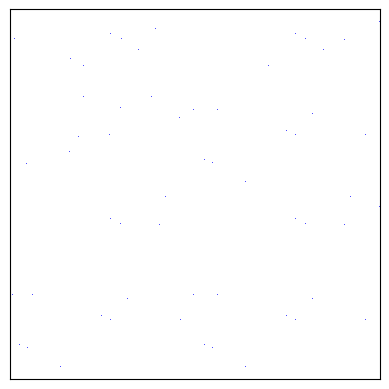

In [17]:
a = Animator()
a.animate(300)

In [40]:
print(a.iters_per_tick)

320
